## Importing Libraries

In [1]:
import pandas as pd                            # File Handling
import numpy as np                             # Mathematical Computation

In [2]:
from sklearn.decomposition import PCA                               # For Implementing Principal Component Analysis

In [3]:
from sklearn.model_selection import train_test_split                # Train/test Split

In [4]:
import matplotlib.pyplot as plt                                     # For visualizing data

In [5]:
from sklearn.neighbors import KNeighborsClassifier                  # For Implementing KNN

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report                   # For Evaluating the Results

In [7]:
from sklearn.metrics import accuracy_score                          # For calculating accuracy of the Model

## Loading Dataset

In [8]:
Dataset = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [9]:
Dataset = Dataset.dropna()                     # Dropping empty rows

In [10]:
Dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
Dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
Dataset.shape

(150, 6)

In [13]:
Dataset["Species"].unique()                      # Unique values of Species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Extracting Data to Transform

In [14]:
X = np.array(Dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])            # Data

## Implementing PCA

In [15]:
pca = PCA(n_components=2)                                                                            # Build and train PCA

In [16]:
pca.fit(X)                                                                                           # Training model

PCA(n_components=2)

In [17]:
X_pca = pca.transform(X)                                                                             # Transform the data according to the trained model

In [18]:
explained_variance = pca.explained_variance_ratio_
print ("Explained variance: ", explained_variance)

Explained variance:  [0.92461621 0.05301557]


## Analysing Transformed Data

In [19]:
print (pca.components_)                                                                              # Components of obtained 2D vector

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [20]:
print (sum(pca.explained_variance_ratio_))                                                           # Amount of variance we managed to preserve

0.9776317750248034


## Visualizing the Model

In [21]:
principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Dataset[['Species']]], axis = 1)                

In [22]:
finalDf.head()

,principal component 1,principal component 2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


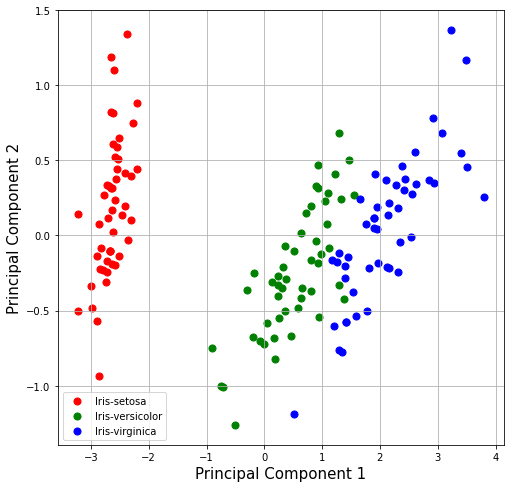

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']                                # All specied name
colors = ['r', 'g', 'b']                                                                      # Giving species color
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']                            # Plotting a scatter plot
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Converting Species

Iris-setosa --> 0
Iris-versicolor --> 1
Iris-virginica --> 2

In [24]:
finalDf["Species"] = finalDf["Species"].replace(to_replace ="Iris-setosa", value =0) 
finalDf["Species"] = finalDf["Species"].replace(to_replace ="Iris-versicolor", value =1) 
finalDf["Species"] = finalDf["Species"].replace(to_replace ="Iris-virginica", value =2) 

In [25]:
finalDf.head()

,principal component 1,principal component 2,Species
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0


## Splitting Data and Targets

In [26]:
X = np.array(finalDf[["principal component 1", "principal component 2"]])
Y = np.array(finalDf["Species"])

## Splitting Train/Test

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)          # 80:20

# Implementing KNN

In [28]:
clf = KNeighborsClassifier(n_neighbors=5)

In [29]:
clf.fit(X_train, Y_train)

KNeighborsClassifier()

## Evaluating Model

In [30]:
y_pred = clf.predict(X_test)

In [31]:
confusion_matrix(Y_test, y_pred)

array([[13,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  6]])

In [32]:
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [33]:
print ("Accuracy of the prediction is: ",accuracy_score(Y_test, y_pred))

Accuracy of the prediction is:  0.9666666666666667
